In [1]:
import numpy as np
import pandas as pd
import os
import subprocess
import pylab as plt
%pylab inline

# make sure we are at the top of the repo
wd = subprocess.check_output('git rev-parse --show-toplevel', shell = True)
os.chdir(wd[:-1]) #-1 removes \n

Populating the interactive namespace from numpy and matplotlib


/home/ben/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
mta = pd.read_csv('data/mta.csv')

In [20]:
mta = mta[mta['DESC'] == 'REGULAR']

In [21]:
mta = mta[np.in1d(mta['TIME'], [str(i).zfill(2) + ':00:00' for i in [0,4,8,12,16,20]])]

In [22]:
mta['t_id'] = mta['UNIT'].astype('str') + mta['SCP'].astype('str')
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,t_id
4531,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456,BMT,12/26/2015,00:00:00,REGULAR,1006897,2487649,R17002-00-00
4532,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456,BMT,12/26/2015,04:00:00,REGULAR,1006901,2487667,R17002-00-00
4533,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456,BMT,12/26/2015,08:00:00,REGULAR,1006904,2487719,R17002-00-00
4534,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456,BMT,12/26/2015,12:00:00,REGULAR,1006928,2487939,R17002-00-00
4535,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456,BMT,12/26/2015,16:00:00,REGULAR,1007031,2488436,R17002-00-00


In [23]:
mta['n_rides'] = mta.groupby(['t_id'])['ENTRIES'].diff()

In [24]:
mta['n_rides'].min()

-1492547710.0

In [25]:
#mta['n_rides'] = abs(mta['n_rides'])
mta = mta[mta['n_rides'] > 0]

In [26]:
mta_daily_turnstile = mta.groupby(['DATE', 'STATION', 't_id'], as_index=False).sum()

In [27]:
mta_daily_turnstile.head()

,DATE,STATION,t_id,ENTRIES,EXITS,n_rides
0,01/01/2016,103 ST,R18000-00-00,47960102,46180738,1310.0
1,01/01/2016,103 ST,R18000-00-01,8300437,2932991,1540.0
2,01/01/2016,103 ST,R18000-00-02,70606744,30879102,1198.0
3,01/01/2016,103 ST,R18000-00-03,44839361,24946366,1216.0
4,01/01/2016,103 ST,R18000-00-04,1498748,2294394,1416.0


In [28]:
mta_daily_station = mta_daily_turnstile.groupby(['DATE', 'STATION'], as_index = False).sum()

In [29]:
mta_daily_station.head()

,DATE,STATION,ENTRIES,EXITS,n_rides
0,01/01/2016,103 ST,745687268,582440984,19822.0
1,01/01/2016,111 ST,28212943,21193773,175.0
2,01/01/2016,116 ST,10256010253,12422391930,21464.0
3,01/01/2016,116 ST-COLUMBIA,7255832901,1534552023,4650.0
4,01/01/2016,125 ST,895699851,652856989,19243.0


In [38]:
mta_daily_station.sort('n_rides', ascending = False).head()

/home/ben/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,DATE,STATION,ENTRIES,EXITS,n_rides
10648,03/02/2016,LORIMER ST,2256778057,2162080678,2.122367e+09
20181,12/29/2015,163 ST-AMSTERDM,4005258817,1396200819,1.952395e+09
13201,03/16/2016,167 ST,7442429633,3635095199,1.771432e+09
8392,02/18/2016,GRD CNTRL-42 ST,16981311781,4395965281,1.349729e+09
3213,01/19/2016,GRD CNTRL-42 ST,17124802816,4505070566,1.320353e+09


In [31]:
mta_daily = mta_daily_station.groupby(['DATE'], as_index = False).sum()

In [32]:
mta_daily.head()

,DATE,ENTRIES,EXITS,n_rides
0,01/01/2016,235047632810,174414173981,996685.0
1,01/02/2016,225104144715,165371253431,1048927.0
2,01/03/2016,227174999926,165651516983,927360.0
3,01/04/2016,228642701062,168286963518,1883877.0
4,01/05/2016,229849921590,167245796142,1923214.0


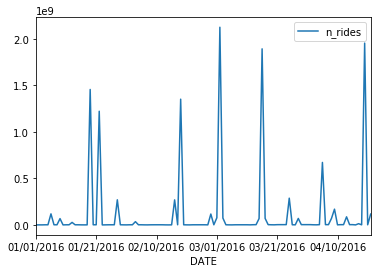

In [33]:
mta_daily.plot(x = 'DATE', y = 'n_rides')

In [34]:
max(mta_daily['n_rides'])

2124446314.0

In [35]:
mta_daily = mta_daily[mta_daily['n_rides'] < 1000000000]

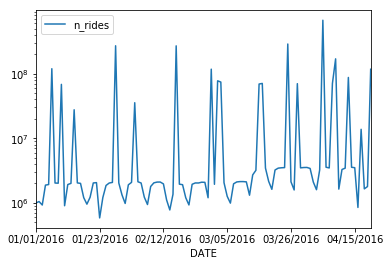

In [37]:
mta_daily.plot(x = 'DATE', y = 'n_rides', logy=True)